<a href="https://colab.research.google.com/github/anamikajha9/Project/blob/main/Books.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Book Crossing Analysis**

---

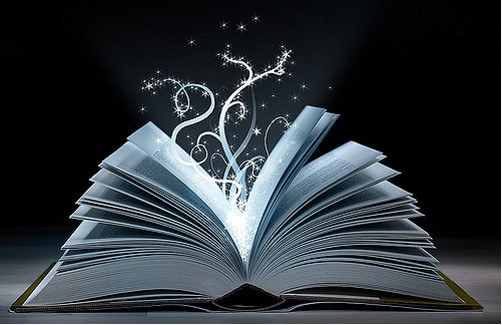

### The data contains 278,858 users (anonymized but with demographic information) providing 1,149,780 ratings (explicit / implicit) about 271,379 books.
- Data Sourced from Kaggle.
- We will analyse this data to check which authour's book our users prefer to read the most, where are they from, what rating is given to the books and some more interesting stuff.


### Downloading The data from Kaggle

In [ ]:
pip install opendatasets --upgrade --quiet

In [ ]:
import opendatasets as od
url = "https://www.kaggle.com/ruchi798/bookcrossing-dataset"
od.download(url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: jhaanamika06
Your Kaggle Key: ··········


100%|██████████| 76.1M/76.1M [00:01<00:00, 73.3MB/s]


- The data file has 19 columns in total
- These columns have ISBN number of the books, names, user details, image of the book, year of publication, author details, summary, category and so on

In [ ]:
datafile = "/content/bookcrossing-dataset/Books Data with Category Language and Summary/Bookcrossing_dataset.csv"

### **Data Preparation and Cleaning**


In [ ]:
import pandas as pd

In [ ]:
# reading the csv file
df = pd.read_csv(datafile)
df

,Unnamed: 0,user_id,location,age,isbn,rating,book_title,book_author,year_of_publication,publisher,img_s,img_m,img_l,Summary,Language,Category,city,state,country
0,0,2,"stockton, california, usa",18.0000,0195153448,0,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,Provides an introduction to classical myths pl...,en,['Social Science'],stockton,california,usa
1,1,8,"timmins, ontario, canada",34.7439,0002005018,5,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],timmins,ontario,canada
2,2,11400,"ottawa, ontario, canada",49.0000,0002005018,0,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],ottawa,ontario,canada
3,3,11676,"n/a, n/a, n/a",34.7439,0002005018,8,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],NaN,NaN,NaN
4,4,41385,"sudbury, ontario, canada",34.7439,0002005018,0,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],sudbury,ontario,canada
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1031170,1031170,278851,"dallas, texas, usa",33.0000,0743203763,0,As Hogan Said . . . : The 389 Best Things Anyo...,Randy Voorhees,2000.0,Simon & Schuster,http://images.amazon.com/images/P/0743203763.0...,http://images.amazon.com/images/P/0743203763.0...,http://images.amazon.com/images/P/0743203763.0...,Golf lovers will revel in this collection of t...,en,['Humor'],dallas,texas,usa
1031171,1031171,278851,"dallas, texas, usa",33.0000,0767907566,5,All Elevations Unknown: An Adventure in the He...,Sam Lightner,2001.0,Broadway Books,http://images.amazon.com/images/P/0767907566.0...,http://images.amazon.com/images/P/0767907566.0...,http://images.amazon.com/images/P/0767907566.0...,A daring twist on the travel-adventure genre t...,en,['Nature'],dallas,texas,usa
1031172,1031172,278851,"dallas, texas, usa",33.0000,0884159221,7,Why stop?: A guide to Texas historical roadsid...,Claude Dooley,1985.0,Lone Star Books,http://images.amazon.com/images/P/0884159221.0...,http://images.amazon.com/images/P/0884159221.0...,http://images.amazon.com/images/P/0884159221.0...,9,9,9,dallas,texas,usa
1031173,1031173,278851,"dallas, texas, usa",33.0000,0912333022,7,The Are You Being Served? Stories: 'Camping In...,Jeremy Lloyd,1997.0,Kqed Books,http://images.amazon.com/images/P/0912333022.0...,http://images.amazon.com/images/P/0912333022.0...,http://images.amazon.com/images/P/0912333022.0...,These hilarious stories by the creator of publ...,en,['Fiction'],dallas,texas,usa


In [ ]:
df.head()

,Unnamed: 0,user_id,location,age,isbn,rating,book_title,book_author,year_of_publication,publisher,img_s,img_m,img_l,Summary,Language,Category,city,state,country
0,0,2,"stockton, california, usa",18.0000,0195153448,0,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,Provides an introduction to classical myths pl...,en,['Social Science'],stockton,california,usa
1,1,8,"timmins, ontario, canada",34.7439,0002005018,5,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],timmins,ontario,canada
2,2,11400,"ottawa, ontario, canada",49.0000,0002005018,0,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],ottawa,ontario,canada
3,3,11676,"n/a, n/a, n/a",34.7439,0002005018,8,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],NaN,NaN,NaN
4,4,41385,"sudbury, ontario, canada",34.7439,0002005018,0,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],sudbury,ontario,canada


In [ ]:
df.columns

Index(['Unnamed: 0', 'user_id', 'location', 'age', 'isbn', 'rating',
       'book_title', 'book_author', 'year_of_publication', 'publisher',
       'img_s', 'img_m', 'img_l', 'Summary', 'Language', 'Category', 'city',
       'state', 'country'],
      dtype='object')

In [ ]:
df.shape

(1031175, 19)

In [ ]:
# provides information such as datatype of the column values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1031175 entries, 0 to 1031174
Data columns (total 19 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   Unnamed: 0           1031175 non-null  int64  
 1   user_id              1031175 non-null  int64  
 2   location             1031175 non-null  object 
 3   age                  1031175 non-null  float64
 4   isbn                 1031175 non-null  object 
 5   rating               1031175 non-null  int64  
 6   book_title           1031175 non-null  object 
 7   book_author          1031175 non-null  object 
 8   year_of_publication  1031175 non-null  float64
 9   publisher            1031175 non-null  object 
 10  img_s                1031175 non-null  object 
 11  img_m                1031175 non-null  object 
 12  img_l                1031175 non-null  object 
 13  Summary              1031175 non-null  object 
 14  Language             1031175 non-null  object 
 15

In [ ]:
# length of the columns
len(df.columns)

19

In [ ]:
# statistical information of the data
df.describe()

,Unnamed: 0,user_id,age,rating,year_of_publication
count,1.031175e+06,1.031175e+06,1.031175e+06,1.031175e+06,1.031175e+06
mean,5.155870e+05,1.405944e+05,3.642902e+01,2.839022e+00,1.995283e+03
std,2.976747e+05,8.052444e+04,1.035354e+01,3.854149e+00,7.309340e+00
min,0.000000e+00,2.000000e+00,5.000000e+00,0.000000e+00,1.376000e+03
25%,2.577935e+05,7.041500e+04,3.100000e+01,0.000000e+00,1.992000e+03
50%,5.155870e+05,1.412100e+05,3.474390e+01,0.000000e+00,1.997000e+03
75%,7.733805e+05,2.114260e+05,4.100000e+01,7.000000e+00,2.001000e+03
max,1.031174e+06,2.788540e+05,9.900000e+01,1.000000e+01,2.008000e+03


In [ ]:
# check if there are missing values
df.isna()

,Unnamed: 0,user_id,location,age,isbn,rating,book_title,book_author,year_of_publication,publisher,img_s,img_m,img_l,Summary,Language,Category,city,state,country
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1031170,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1031171,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1031172,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1031173,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
# checking the number of missing values in every column
df.isna().sum().sort_values(ascending = False)

country                35374
state                  22798
city                   14103
img_s                      0
Category                   0
Language                   0
Summary                    0
img_l                      0
img_m                      0
Unnamed: 0                 0
user_id                    0
year_of_publication        0
book_author                0
book_title                 0
rating                     0
isbn                       0
age                        0
location                   0
publisher                  0
dtype: int64

In [ ]:
# checking the number of missing values in percentage in every column
missing_percentage = df.isna().sum().sort_values(ascending = False) / len(df)
missing_percentage

country                0.034305
state                  0.022109
city                   0.013677
img_s                  0.000000
Category               0.000000
Language               0.000000
Summary                0.000000
img_l                  0.000000
img_m                  0.000000
Unnamed: 0             0.000000
user_id                0.000000
year_of_publication    0.000000
book_author            0.000000
book_title             0.000000
rating                 0.000000
isbn                   0.000000
age                    0.000000
location               0.000000
publisher              0.000000
dtype: float64

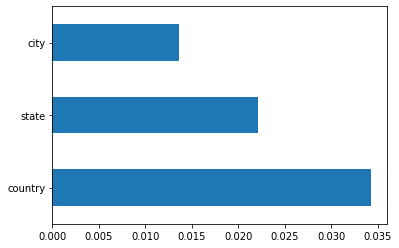

In [ ]:
# plotting non zero missing percentage values
missing_percentage[missing_percentage  != 0].plot(kind = 'barh')

#### This plot shows that even though there are missing values in these three columns, they are less than even 5%





In [ ]:
# dropping columns we don't need
df.drop(['img_s','img_l'], axis='columns', inplace=True)

In [ ]:
df.shape

(1031175, 17)

In [ ]:
df.drop('Unnamed: 0', inplace=True, axis=1)

In [ ]:
df["Language"].replace({"9":"unknown"}, inplace=True)


### With this information we can see that ---
- The average age group of readers is 36 year olds.
- The minimum age group id just 5 year olds whereas the maximum is 99 years of age.
- The oldest published book available here dates back to 1376!
- The latest publication is in the year 2008.

### **book_author column**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
sns.set_style('darkgrid')

In [ ]:
# all the authors in the data
df.book_author.unique()

array(['Mark P. O. Morford', 'Richard Bruce Wright', "Carlo D'Este", ...,
       'Claude Dooley', 'Jeremy Lloyd', 'Mapsco'], dtype=object)

In [ ]:
len(df.book_author.unique())

101594

In [ ]:
# number of books published by the author
author = df.book_author.value_counts()
author

Stephen King          10053
Nora Roberts           8429
John Grisham           6010
James Patterson        5845
Mary Higgins Clark     4777
                      ...  
G. Howard Gillelan        1
Alton McEachern           1
Reyna T. Lorele           1
George Childs Kohn        1
Mapsco                    1
Name: book_author, Length: 101594, dtype: int64

In [ ]:
author[:20]

Stephen King                 10053
Nora Roberts                  8429
John Grisham                  6010
James Patterson               5845
Mary Higgins Clark            4777
Dean R. Koontz                4313
Tom Clancy                    4036
Danielle Steel                3726
Sue Grafton                   3457
Janet Evanovich               3350
Anne Rice                     3030
Michael Crichton              2921
J. K. Rowling                 2908
JOHN GRISHAM                  2808
V.C. Andrews                  2785
Sandra Brown                  2663
Nicholas Sparks               2650
R. L. Stine                   2606
Rich Shapero                  2502
Patricia Daniels Cornwell     2461
Name: book_author, dtype: int64

In [ ]:
'Agatha Christie' in df.book_author
'William Shakespeare' in df.book_author
'Stephen King' in df.book_author

False

In [ ]:
def barplot(df,col,l):
    df_v=df[col].value_counts().head(20).reset_index()
    df_v.columns=[col,'count']

    plt.figure(figsize=(10,12))
    sns.barplot(x='count',y=col,data=df_v)
    plt.ylabel(l)
    plt.title(l,size=20)
    plt.show()

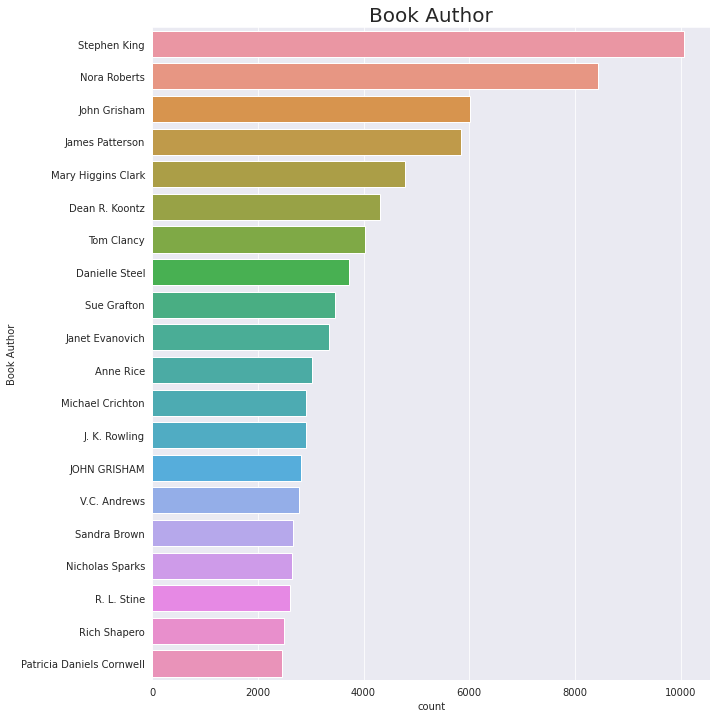

In [ ]:
barplot(df,'book_author','Book Author')

In [ ]:
famous_authors = author[author > 1000]
not_so_famous_authors = author[author < 1000]

In [ ]:
len(famous_authors)

99

In [ ]:
author[author == 1]

Marten Toonder        1
Marangraphics         1
Laurice Pearson       1
Fanny Howe            1
John, Hewish          1
                     ..
G. Howard Gillelan    1
Alton McEachern       1
Reyna T. Lorele       1
George Childs Kohn    1
Mapsco                1
Name: book_author, Length: 49281, dtype: int64

Insights
- Agatha Chrishtie and William Shakespeare, the renowed and famous writers of the 1900s are not present in the data.
- Less than 1% of the authors have more than a 1000 readers of their books.
- 48% of the author's book has been read by just one user.

### **Distribution of rating of the books**

In [ ]:
Rating = df['rating'].value_counts()
Rating

0     647323
8      91806
10     71227
7      66404
9      60780
5      45355
6      31689
4       7617
3       5118
2       2375
1       1481
Name: rating, dtype: int64

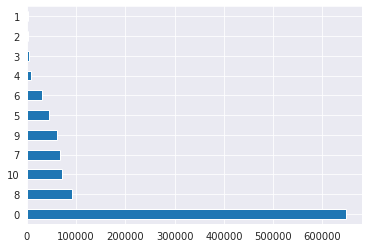

In [ ]:
Rating.plot(kind='barh')

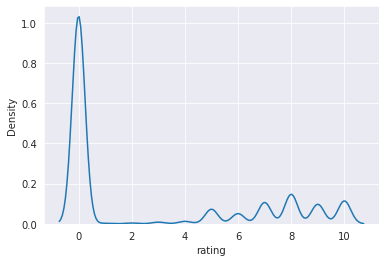

In [ ]:
sns.kdeplot(data=df['rating'])

Insights :
- 0 rating is mostly no rating given to the books so we will just disregard that.
- Most of the books have high rating like 7, 8, 9 or 10 than have poor rating like 1,2 or 3.
- The most given rating is 8


### **Year of Publication**

In [ ]:
publication_year = df.year_of_publication.unique()
publication_year

array([2002., 2001., 1991., 1999., 2000., 1993., 1996., 1988., 2004.,
       1998., 1994., 2003., 1997., 1987., 1989., 1992., 1983., 1979.,
       1995., 1982., 1985., 1986., 1978., 1980., 1952., 1990., 1981.,
       1984., 1968., 1961., 1959., 1946., 1974., 1958., 1976., 1971.,
       1977., 1975., 1965., 1941., 1970., 1972., 1953., 1962., 1973.,
       1960., 1954., 1966., 1920., 1967., 1956., 1942., 1955., 1951.,
       1969., 1948., 1963., 1964., 1950., 2005., 1943., 1957., 1937.,
       1940., 1930., 1923., 1945., 1947., 1936., 1925., 1927., 1939.,
       1926., 1938., 1911., 1904., 1949., 1932., 1929., 1944., 1933.,
       1922., 1897., 1902., 1924., 1921., 1900., 1928., 2006., 1901.,
       1931., 1378., 1908., 1909., 2008., 1935., 1376., 1906., 1806.,
       1917., 1919., 1914., 1934., 1910.])

In [ ]:
print(sorted(publication_year))

[1376.0, 1378.0, 1806.0, 1897.0, 1900.0, 1901.0, 1902.0, 1904.0, 1906.0, 1908.0, 1909.0, 1910.0, 1911.0, 1914.0, 1917.0, 1919.0, 1920.0, 1921.0, 1922.0, 1923.0, 1924.0, 1925.0, 1926.0, 1927.0, 1928.0, 1929.0, 1930.0, 1931.0, 1932.0, 1933.0, 1934.0, 1935.0, 1936.0, 1937.0, 1938.0, 1939.0, 1940.0, 1941.0, 1942.0, 1943.0, 1944.0, 1945.0, 1946.0, 1947.0, 1948.0, 1949.0, 1950.0, 1951.0, 1952.0, 1953.0, 1954.0, 1955.0, 1956.0, 1957.0, 1958.0, 1959.0, 1960.0, 1961.0, 1962.0, 1963.0, 1964.0, 1965.0, 1966.0, 1967.0, 1968.0, 1969.0, 1970.0, 1971.0, 1972.0, 1973.0, 1974.0, 1975.0, 1976.0, 1977.0, 1978.0, 1979.0, 1980.0, 1981.0, 1982.0, 1983.0, 1984.0, 1985.0, 1986.0, 1987.0, 1988.0, 1989.0, 1990.0, 1991.0, 1992.0, 1993.0, 1994.0, 1995.0, 1996.0, 1997.0, 1998.0, 1999.0, 2000.0, 2001.0, 2002.0, 2003.0, 2004.0, 2005.0, 2006.0, 2008.0]


In [ ]:
publishYear = df.year_of_publication.value_counts()
publishYear

2002.0    91801
2001.0    79803
1999.0    75195
2003.0    72539
2000.0    72334
          ...  
1376.0        1
2008.0        1
1378.0        1
1904.0        1
1910.0        1
Name: year_of_publication, Length: 104, dtype: int64

In [ ]:
x = publishYear.head(20)
x

2002.0    91801
2001.0    79803
1999.0    75195
2003.0    72539
2000.0    72334
1998.0    64209
1994.0    60533
1997.0    59361
1996.0    58826
1995.0    54093
1993.0    38190
1992.0    35194
1991.0    32722
1990.0    30553
2004.0    25971
1989.0    25165
1988.0    20887
1987.0    18896
1986.0    16859
1984.0    13806
Name: year_of_publication, dtype: int64

In [ ]:
pub = df.publisher.value_counts().head(10)
pub

Ballantine Books            34724
Pocket                      31989
Berkley Publishing Group    28614
Warner Books                25506
Harlequin                   25029
Bantam Books                23600
Bantam                      20007
Signet Book                 19155
Avon                        17352
Penguin Books               17033
Name: publisher, dtype: int64

### Insights :
- The most read books were published in the year 2002.
- The oldest books available dates back to 1376.
- The most read books are from the 80s, 90s and early 2000s
- Ballantime books are the publishers with highest demand.



### **Language of the books**

In [ ]:
Lang = df.Language.unique()
Lang

array(['en', 'unknown', 'de', 'fr', 'es', 'ca', 'it', 'da', 'nl', 'pt',
       'gl', 'ro', 'no', 'el', 'ms', 'la', 'ru', 'zh-CN', 'ga', 'pl',
       'tl', 'th', 'ja', 'cy', 'fa', 'eo', 'gd', 'hi', 'vi', 'ar',
       'zh-TW', 'ko', 'sv'], dtype=object)

In [ ]:
len(Lang)

33

In [ ]:
df.Language.value_counts().head(10)

en         618505
unknown    398937
de           5725
es           3425
fr           3223
it            732
nl            238
da            119
pt            100
ca             49
Name: Language, dtype: int64

### Insights :
- English is the highest preferred language. 

### **Country**

In [ ]:
len(df.country.unique())

415

In [ ]:
user_country = df.country.value_counts().head(10)
user_country

usa               745840
canada             92957
united kingdom     32011
germany            27655
australia          18217
spain              14774
france             10632
portugal            6975
new zealand         5557
malaysia            5083
Name: country, dtype: int64

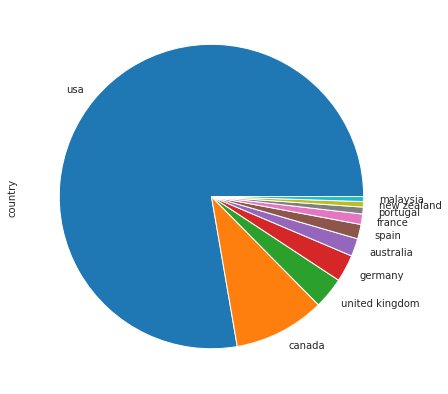

In [ ]:
df.country.value_counts().head(10).plot(kind='pie',figsize=(7,7))

### Insights :
- Users are diverse in this data from a total of 415 different countries!
- Ofcourse, the highest number of readers are from the USA.

In [ ]:
df.corr()

,user_id,age,rating,year_of_publication
user_id,1.000000,-0.007092,-0.044014,-0.009427
age,-0.007092,1.000000,-0.020143,-0.013797
rating,-0.044014,-0.020143,1.000000,0.037610
year_of_publication,-0.009427,-0.013797,0.037610,1.000000


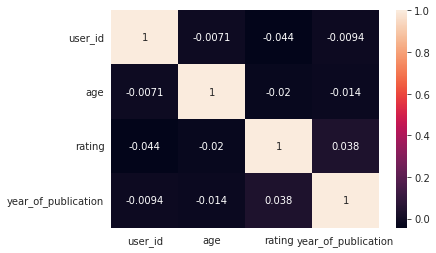

In [ ]:
sns.heatmap(df.corr(),annot=True)

- Heatmap shows there is no co-relation between any of the columns i.e. non of the column values are dependent on each other

In [ ]:
from wordcloud import WordCloud,STOPWORDS

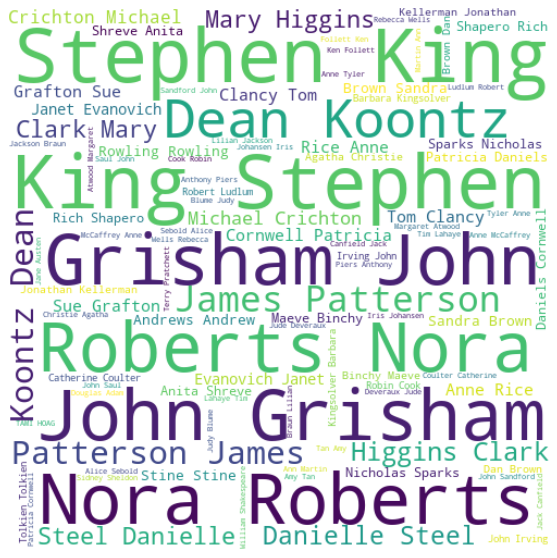

In [ ]:
plt.subplots(figsize=(10,10))
wc = WordCloud(background_color="white", max_words=100,
               stopwords=STOPWORDS, max_font_size=256,
               random_state=42, width=500, height=500)
wc.generate(' '.join(df['book_author']))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

### Wordcloud for all the amazing writers for making our life more interesting!